## Digit recognition: Logistic Regression

**Strategy:** First classify digits individually (binary classifier). Then multivariate logistic regression.<br/>
**Measurement:** Accuracy score and negative log loss
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV

**Get the data**

In [2]:
raw_training_data = pd.read_csv("data/zip.train", header=None , sep=" ")
test_data = pd.read_csv("data/zip.test", header=None , sep=" ")

**Functions for removing NaN and rename target column**

In [3]:
def remove_nan (df):
    return df.dropna(axis=1, how='any',thresh=None)

def rename_labels (df):
    return df.rename(columns={0:'Labels'}, inplace=True)

**Clean data with the help of above functions**

In [4]:
rename_labels(raw_training_data)
training_data = remove_nan(raw_training_data) # Give the training data a new, better name

rename_labels(test_data) # There are no NaN values in the test set

**Reserve some training data for fine tuning**

In [5]:
training_data, extra_training_data = train_test_split(training_data, test_size=0.05, random_state=11)


**Eyeball the digit distribution among data sets**

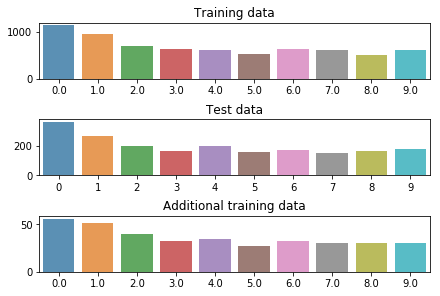

In [6]:
traincount = pd.value_counts(training_data['Labels'].values, sort=True)
extracount = pd.value_counts(extra_training_data['Labels'].values,sort=True)
testcount = pd.value_counts(test_data['Labels'].values, sort=True)

f,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True)
sns.barplot(traincount.index, traincount.values, alpha=0.8,ax=ax1)
sns.barplot(testcount.index, testcount.values, alpha=0.8,ax=ax2)
sns.barplot(extracount.index, extracount.values, alpha=0.8,ax=ax3)
ax1.set_title('Training data')
ax2.set_title('Test data')
ax3.set_title('Additional training data')
plt.show()

**Functions to manipulate the dataframe**

In [7]:
def remove_labels(df):
    return df.drop('Labels',axis=1)
        
def get_labels(df):
    return pd.DataFrame(df['Labels'])

def get_digit (df,digit):
    return df.loc[df['Labels']== digit]

def not_digit (df,digit):
    return df.loc[df['Labels']!= digit]

**Function(s) to manipulate data for logistic regression classification**

In [8]:
def get_classified (df,digit):
    df.loc[df.Labels == digit, 'Labels'] = "True"
    df.loc[df.Labels != 'True', 'Labels'] = 0
    df.loc[df.Labels != 0, 'Labels'] = 1
    return df['Labels']



**Cost function(s)**

In [9]:
def get_accuracy(prediction,label):
    return accuracy_score(prediction,label,normalize=True)


**Organize training data into digit and not-digit (input and targets)**

In [10]:
train_img = remove_labels(training_data)
train_label = get_labels(training_data)
extra_img = remove_labels(extra_training_data)
extra_label = get_labels(extra_training_data)

In [11]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [27]:
logisticRegr.fit(train_img, train_label)

/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
predictions = logisticRegr.predict(X=extra_img)

In [31]:
score = logisticRegr.score(extra_img, extra_label)

In [32]:
score

0.9315068493150684

## Logistic regression for each digit

In [33]:
zero_train = get_classified(get_labels(training_data),0)

In [43]:
train_img = remove_labels(training_data)
train_label = get_labels(training_data)['Labels']

In [ ]:
def ()

In [69]:
def train_predict(digit):
    y_values = get_classified(get_labels(training_data),digit)
    logreg = LogisticRegression()
    logreg.fit(train_img,y_values)
    return logreg.predict(extra_img)

for i in range (0,9):
    print pd.value_counts(train_predict(i))
#print pd.value_counts(train_predict(1))
#print pd.value_counts(train_predict(2))
#print pd.value_counts(train_predict(3))
#print pd.value_counts(train_predict(4))
#print pd.value_counts(train_predict(5))
#print pd.value_counts(train_predict(6))
#print pd.value_counts(train_predict(7))
#print pd.value_counts(train_predict(8))
#print pd.value_counts(train_predict(9))

0    307
1     58
dtype: int64
0    316
1     49
dtype: int64
0    325
1     40
dtype: int64
0    331
1     34
dtype: int64
0    329
1     36
dtype: int64
0    338
1     27
dtype: int64
0    335
1     30
dtype: int64
0    333
1     32
dtype: int64
0    331
1     34
dtype: int64


In [74]:
pd.value_counts(extra_training_data['Labels'].values)

0.0    56
1.0    51
2.0    40
4.0    35
6.0    33
3.0    33
7.0    30
8.0    30
9.0    30
5.0    27
dtype: int64

**Make an instance of the model**

In [ ]:
logreg = LogisticRegression()

**Train the Logistic Regression model**

In [ ]:
logreg.fit(X_train,zero_train)

In [ ]:
zero_predict = logreg.predict(X_train[0:10])
print (zero_predict)
print (get_labels(training_data[0:10]))

Yup, that did it all right. The vector at index 8 represents a zero, all others are not zero.